## Gender Classification

Content
This dataset contains 7 features and a label column.

longhair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".

foreheadwidthcm - This column is in CM's. This is the width of the forehead.

foreheadheightcm - This is the height of the forehead and it's in Cm's.

nosewide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".

noselong - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".

lipsthin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".

distancenosetoliplong - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

gender - This is either "Male" or "Female".

In [1]:
# Import Modul yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import plotly.express as px
import missingno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [2]:
df = pd.read_csv('gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [6]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['Gender'].replace(['Female', 'Male'],[0,1],inplace=True)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


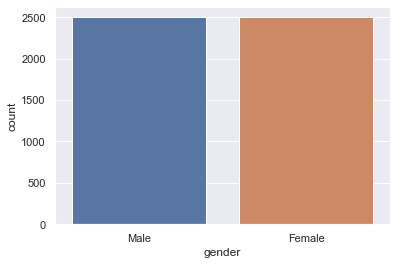

In [4]:
sns.countplot(df['gender'])

In [5]:
def summary_table(df): #function to create an added information regarding the dataset
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes, #display datatype
                                  null = df.isna().sum(), #sum of null values
                                  null_percentage = round(df.isna().sum() / len(df) *100,2),#how many percente null values
                                  unique = df.nunique(),  #cek for number of unique values
                                  uniqueSample = [list(df[i].sample(3).drop_duplicates()) for i in df.columns] #3 random samples
                               )
                           ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(df) *100,2) #convert unique to percentage values
    return summary

In [8]:
summary_table(df)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,long_hair,int64,0,0.0,2,[1],0.04
1,forehead_width_cm,float64,0,0.0,42,"[14.1, 12.4, 12.1]",0.84
2,forehead_height_cm,float64,0,0.0,21,"[5.3, 5.8, 6.0]",0.42
3,nose_wide,int64,0,0.0,2,"[0, 1]",0.04
4,nose_long,int64,0,0.0,2,"[0, 1]",0.04
5,lips_thin,int64,0,0.0,2,"[1, 0]",0.04
6,distance_nose_to_lip_long,int64,0,0.0,2,"[1, 0]",0.04
7,gender,object,0,0.0,2,"[Female, Male]",0.04


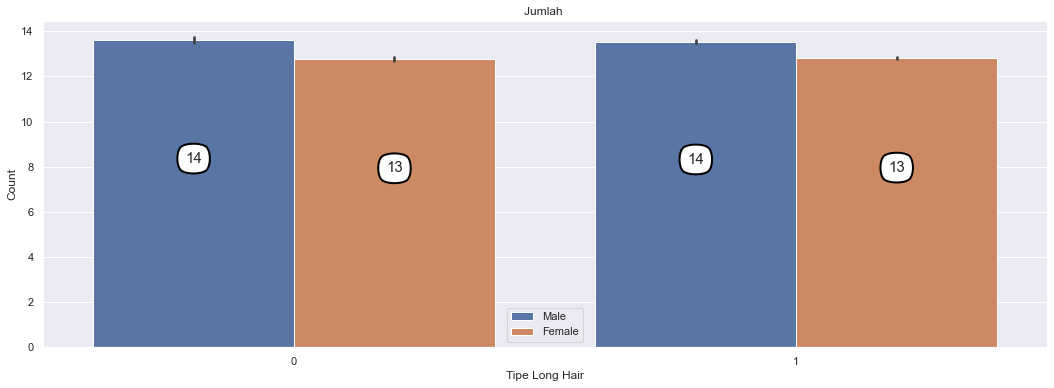

In [14]:
plt.figure(figsize=(18,6))
plots = sns.barplot(data = df, x='long_hair', y='forehead_width_cm',  hue='gender')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
plt.title('Jumlah ')
plt.xlabel('Tipe Long Hair')
plt.ylabel('Count')
plt.legend()
plt.show()

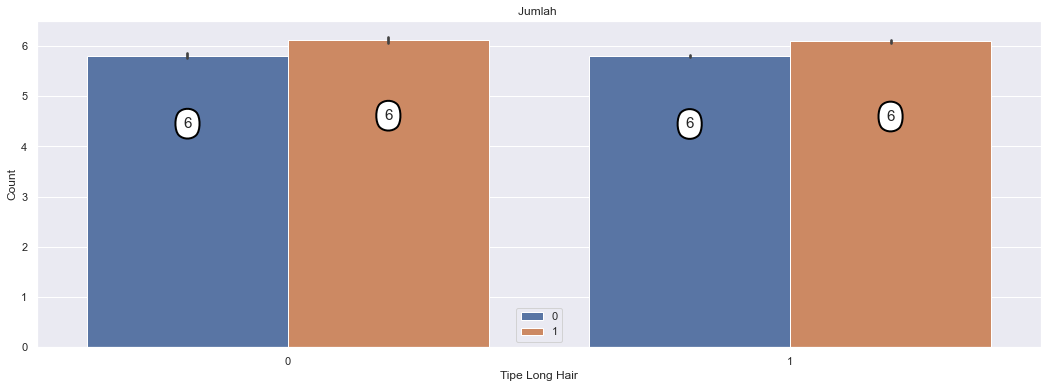

In [71]:
plt.figure(figsize=(18,6))
plots = sns.barplot(data = df, x='long_hair', y='forehead_height_cm',  hue='gender')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
plt.title('Jumlah ')
plt.xlabel('Tipe Long Hair')
plt.ylabel('Count')
plt.legend()
plt.show()

In [16]:
df['gender'].replace(['Female', 'Male'],[0,1],inplace=True)

In [17]:
X = df.drop('gender',axis=1)
y = df['gender']

In [20]:
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:44:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       501
           1       0.99      0.95      0.97       500

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


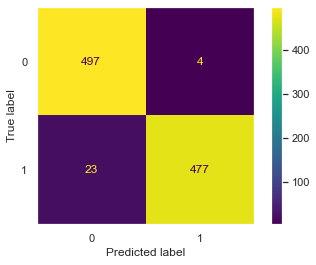

In [26]:
from xgboost import XGBRFClassifier
xgb_fit = XGBRFClassifier(random_state=42).fit(X_train, y_train)

pred_xgb = xgb_fit.predict(X_test)
print(classification_report(y_test, pred_xgb))

plot_confusion_matrix(estimator=xgb_fit, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

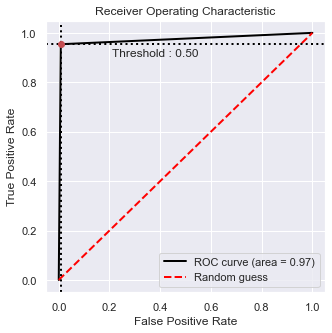

In [27]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, pred_xgb, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [28]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 
                                     'Score':xgb_fit.feature_importances_}).sort_values(by ='Score', 
                                                                                                   ascending = False)
features_importances.head()

,Features,Score
3,nose_wide,0.680953
6,distance_nose_to_lip_long,0.195467
4,nose_long,0.056710
5,lips_thin,0.054828
1,forehead_width_cm,0.006011


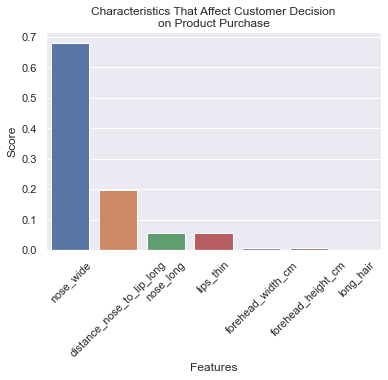

In [30]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

In [31]:
# import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [32]:
# models
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
nb = GaussianNB()

In [33]:
# modeling
models = [rf, svm, lr, dt, knn, nb]

for model in models:
    model.fit(X_train, y_train)

In [34]:
# Evaluation
ypred_rf = rf.predict(X_test)
ypred_svm = svm.predict(X_test)
ypred_lr = lr.predict(X_test)
ypred_dt = dt.predict(X_test)
ypred_knn = knn.predict(X_test)
ypred_nb = nb.predict(X_test)

## Random Forest Classifier

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       501
           1       0.98      0.95      0.97       500

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



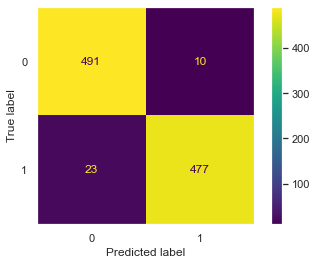

In [35]:
print(classification_report(y_test, ypred_rf))
plot_confusion_matrix(estimator=rf, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

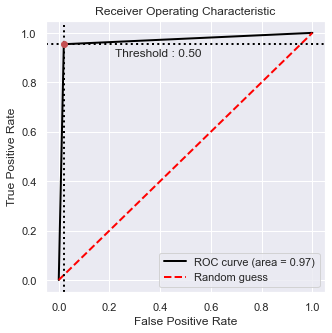

In [36]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_rf, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [37]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 
                                     'Score':rf.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

,Features,Score
6,distance_nose_to_lip_long,0.245215
3,nose_wide,0.218614
5,lips_thin,0.204523
4,nose_long,0.183048
1,forehead_width_cm,0.084143


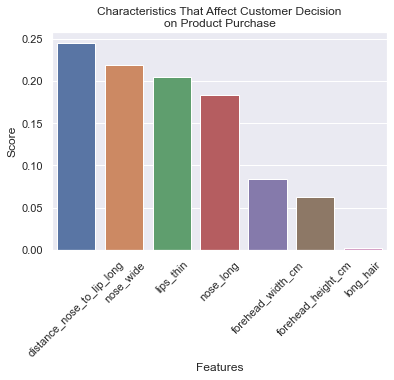

In [38]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

## Support Vector Classifier

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       501
           1       0.98      0.96      0.97       500

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



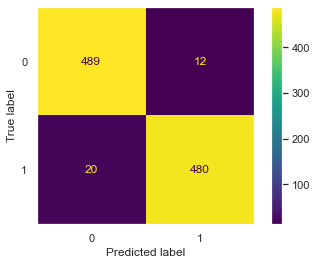

In [39]:
print(classification_report(y_test, ypred_svm))
plot_confusion_matrix(estimator=svm, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

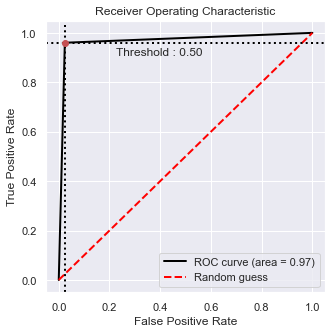

In [40]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_svm, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Logistic Regression

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       501
           1       0.96      0.96      0.96       500

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



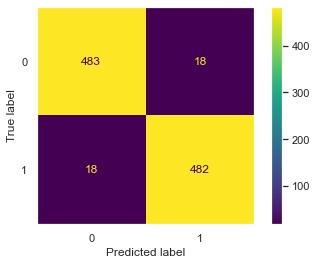

In [41]:
print(classification_report(y_test, ypred_lr))
plot_confusion_matrix(estimator=lr, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

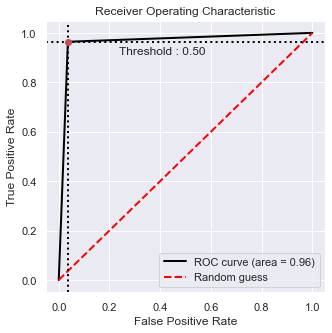

In [42]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_lr, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       501
           1       0.98      0.96      0.97       500

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



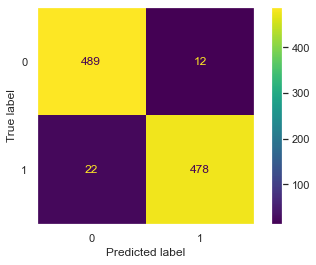

In [44]:
print(classification_report(y_test, ypred_dt))
plot_confusion_matrix(estimator=dt, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

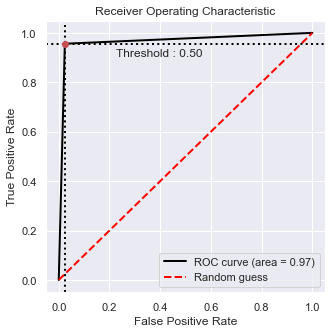

In [45]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_dt, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [46]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 'Score':dt.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

,Features,Score
3,nose_wide,0.586653
6,distance_nose_to_lip_long,0.124811
5,lips_thin,0.095871
4,nose_long,0.088813
1,forehead_width_cm,0.053202


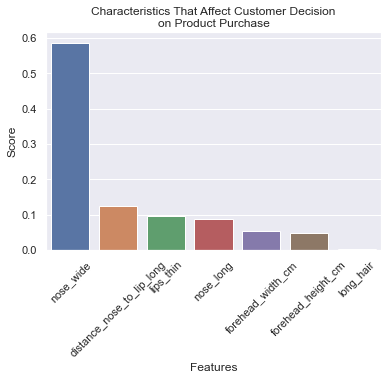

In [47]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

## KNN

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       501
           1       0.98      0.95      0.96       500

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



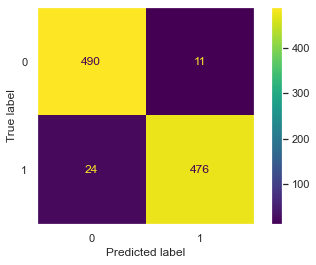

In [48]:
print(classification_report(y_test, ypred_knn))
plot_confusion_matrix(estimator=knn, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

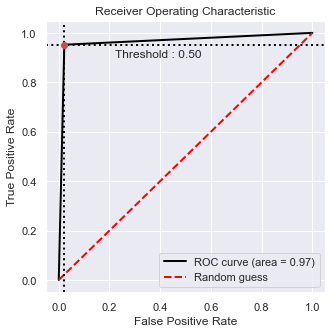

In [49]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_knn, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Naive Bayes

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       501
           1       0.98      0.96      0.97       500

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



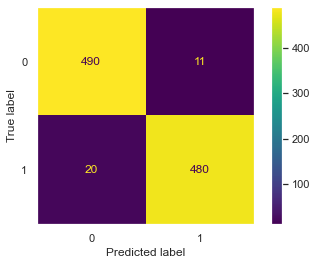

In [50]:
print(classification_report(y_test, ypred_nb))
plot_confusion_matrix(estimator=nb, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

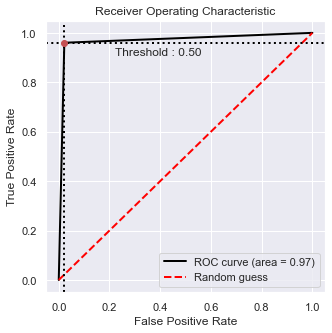

In [51]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_nb, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [52]:
#import gridsearch
from sklearn.model_selection import GridSearchCV

In [53]:
model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'C' : [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'kernel': ['rbf'],
            'gamma' : ['scale', 'auto']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [i for i in range(1,100,5)],
            'criterion' : ['gini', 'entropy'],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'n_jobs' : [-1]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'penalty' : ['l1', 'l2', 'elasticnet'],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class' : ['auto', 'ovr', 'multinomial'],
            'n_jobs' : [-1]
        }
    }
}

In [61]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_params = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_params

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

,model,best_score,best_params
0,svm,0.97575,"{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}"
1,random_forest,0.97250,"{'criterion': 'entropy', 'max_features': 'log2..."
2,logistic_regression,0.96950,"{'C': 8.0, 'multi_class': 'auto', 'n_jobs': -1..."


In [62]:
df_params['best_params'][0]

{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}

In [57]:
model = SVC(C=1, gamma='auto', kernel='rbf')

In [58]:
model.fit(X_train, y_train)

SVC(C=1, gamma='auto')

In [59]:
y_test_pred_model = model.predict(X_test)
y_train_pred_model = model.predict(X_train)

from sklearn.metrics import accuracy_score
modelrfc_acc=accuracy_score(y_test_pred_model,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred_model,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred_model,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred_model,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred_model,y_test))

Train Set Accuracy:97.6
Test Set Accuracy:97.2027972027972

Confusion Matrix:
[[494  21]
 [  7 479]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       515
           1       0.96      0.99      0.97       486

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



              precision    recall  f1-score   support

           0       0.96      0.99      0.97       501
           1       0.99      0.96      0.97       500

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



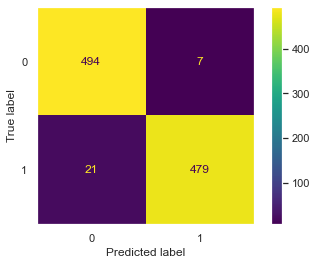

In [60]:
print(classification_report(y_test, y_test_pred_model))
plot_confusion_matrix(estimator=model, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

In [63]:
df_params['best_params'][1]

{'criterion': 'entropy',
 'max_features': 'log2',
 'n_estimators': 71,
 'n_jobs': -1}

In [64]:
model2 = RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=71, n_jobs=-1)

In [65]:
model2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=71, n_jobs=-1)

In [66]:
y_test_pred_model2 = model2.predict(X_test)
y_train_pred_model2 = model2.predict(X_train)

from sklearn.metrics import accuracy_score
modelrfc_acc=accuracy_score(y_test_pred_model2,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred_model2,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred_model2,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred_model2,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred_model2,y_test))

Train Set Accuracy:99.85000000000001
Test Set Accuracy:96.8031968031968

Confusion Matrix:
[[491  22]
 [ 10 478]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       513
           1       0.96      0.98      0.97       488

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



              precision    recall  f1-score   support

           0       0.96      0.98      0.97       501
           1       0.98      0.96      0.97       500

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



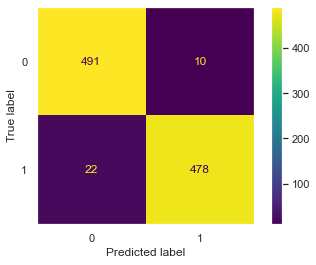

In [67]:
print(classification_report(y_test, y_test_pred_model2))
plot_confusion_matrix(estimator=model2, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)